##Time Series Forecasting -Bit Predict

In [30]:
#get data
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv"

--2021-08-28 03:26:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2021-08-28 03:26:42 (7.34 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



##Importing data with pandas


In [31]:
#import with pandas
import pandas as pd

df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
               parse_dates=["Date"],
               index_col=["Date"])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [33]:
#data count
len(df)

2787

#Visualize the data

In [34]:
#take clsoing price and data
bitcoin_prices=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)" :"Price" })
bitcoin_prices.head()


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


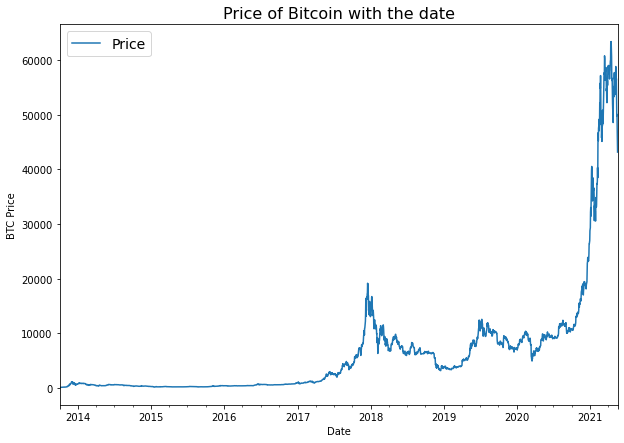

In [35]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin with the date",fontsize=16)
plt.legend(fontsize=14)

#Importing time series data with python csv module

In [36]:
#formatting data 
import csv
from datetime import datetime

timesteps =[]
btc_price =[]

with open ("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv") as f:
  csv_reader=csv.reader(f,delimiter=",")
  
  #skip the first line (remove the header line
  next(csv_reader)

  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))

#view first 10
timesteps[:10],btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

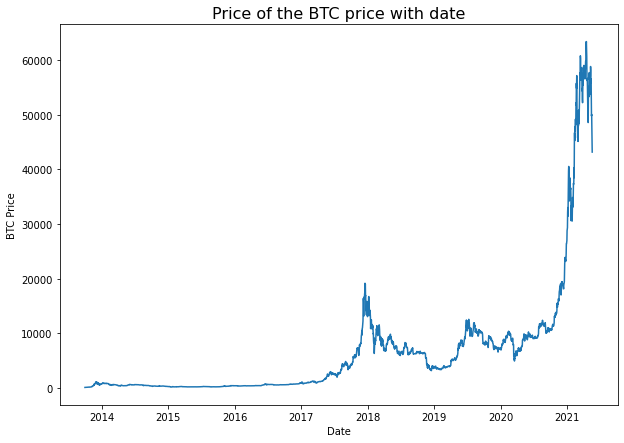

In [37]:
#plot from csv
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.ylabel("BTC Price")
plt.title("Price of the BTC price with date",fontsize=16)
plt.xlabel("Date")



---



#Create data part :Train and Test Data


In [38]:
#get bitcoin data arrya
timesteps=bitcoin_prices.index.to_numpy()
prices=bitcoin_prices["Price"].to_numpy()
    
timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [39]:
#wrong way
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(timesteps,
                                                prices,
                                                test_size=0.2,
                                                random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

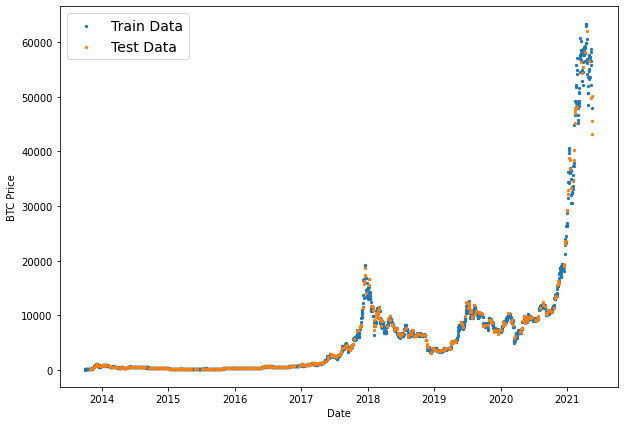

In [40]:
#plot the wrong test and train data
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train Data")
plt.scatter(X_test,y_test,s=5,label="Test Data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

#Create Train and Test data -Correct way

In [41]:
#craete train and test splits 
split_size =int(0.8 *len(prices))

#create train data splits
X_train,y_train =timesteps[:split_size],prices[:split_size]


#create test data splits
X_test,y_test =timesteps[split_size:],prices[split_size:]

len(X_train),len(X_test),len(y_train),len(y_test)

(2229, 558, 2229, 558)

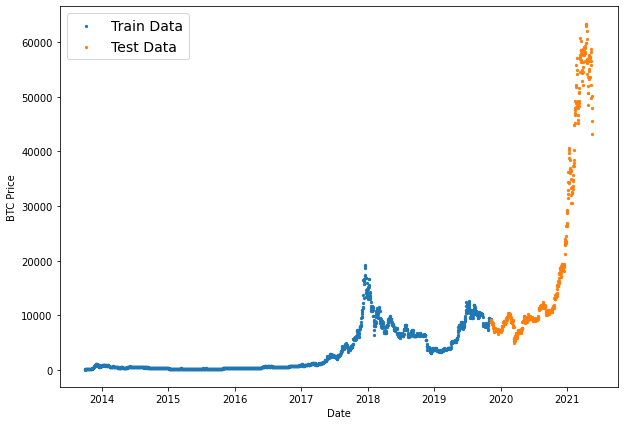

In [42]:
#plot the data
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train Data")
plt.scatter(X_test,y_test,s=5,label="Test Data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

#Plot and Visualize Data

In [43]:
#create plot function to plot time series data
def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):
  """
  Plot the timesteps aginst the values

  parameters:
  timesteps : array of timesteps values
  values :array of values across time
  format :style of plot, default "."
  start :where start the plot
  end :where to end the plot
  label =label to show on the plot
  """
 
  #plot the series
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

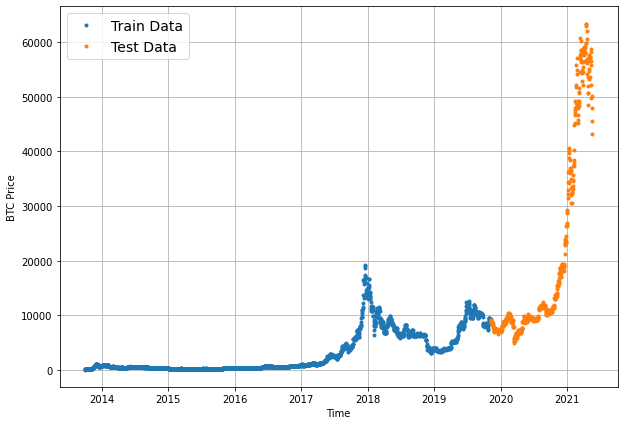

In [44]:
#test the plotting fucntion
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train Data")
plot_time_series(timesteps=X_test,values=y_test,label="Test Data")

#Model 0 -Naive Forecast Model (Base line Model)

In [45]:
#create naive forecast
naive_forecast =y_test[:-1]

naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

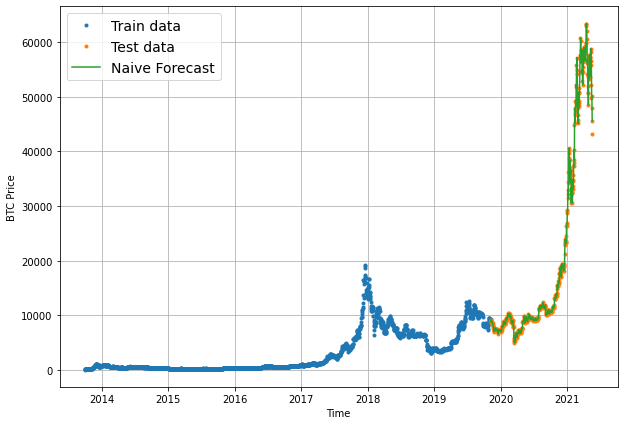

In [46]:
#plot the naive forecast
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,label="Test data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,format="-",label="Naive Forecast")

#Evalauting the time series model

In [47]:
import tensorflow as tf


In [48]:
#mase implementation
def mean_absolute_scaled_error(y_true,y_pred):
  """
  Implement MASE(asssuming no saeonability of data)


  """
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))

  #find the mae of naive forecast
  mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive_no_season

In [49]:
mean_absolute_scaled_error(y_true=y_test[1:] ,y_pred=naive_forecast).numpy()

0.9995699939182624

In [50]:
#craete a function to take model predctions and truth values and return evaluation metrics
def evaluate_preds(y_true,y_pred):
  
  #make sure float32 datatype
  y_true =tf.cast(y_true,dtype=tf.float32)
  y_pred =tf.cast(y_pred,dtype=tf.float32)

  #calculate various evalution metrics
  mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse=tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse =tf.sqrt(mse)
  mape =tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase=mean_absolute_scaled_error(y_true,y_pred)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}


In [51]:
naive_results =evaluate_preds(y_true=y_test[1:],
                              y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [52]:
tf.reduce_mean(y_test),tf.reduce_min(y_test),tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>,
 <tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

#Format the data :windowing the data

In [53]:
btc_price[:7],btc_price[7]

([123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795],
 123.033)

In [55]:
#set up global varibale
HORIZON=1#predict next day
WINDOW_SIZE=7 #use past 7 days to predict

In [56]:
#create fucntion to label windowed data
def get_labelled_window(x,horizon=HORIZON):
  """
  carets labels for windowed dataset

  eg:
  horizon =1
  INPUT :[0,1,2,3,4,5,6,7] -->output ([0,1,2,3,4,5,6,7],[8])
  """

  return x[:,:-horizon],x[:,-horizon]



In [59]:
#test out the window labelling function
test_window,test_label =get_labelled_window(tf.expand_dims(tf.range(8),axis=0))
print(f"Window :{tf.squeeze(test_window).numpy()} -->Label: {tf.squeeze(test_label).numpy()}")

Window :[0 1 2 3 4 5 6] -->Label: 7
